# An Introduction to Graph Theory and Network Analysis

- https://www.analyticsvidhya.com/blog/2018/04/introduction-to-graph-theory-network-analysis-python-codes/

In [1]:
# brew install graphviz pkg-config
# pip install pygraphviz

In [2]:
import networkx as nx
from matplotlib import pyplot as plt
import pygraphviz as pgv
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
# Creating a Graph 
G = nx.Graph() # Right now G is empty

# Add a node
G.add_node(1) 
node_list = [2,3]
G.add_nodes_from(node_list) # You can also add a list of nodes by passing a list argument

# Add edges 
G.add_edge(1,2)

e = (2,3)
G.add_edge(*e) # * unpacks the tuple
edge_list = [(1,2), (1,3)]
G.add_edges_from(edge_list) # Just like nodes we can add edges from a list

### Graph Visualization

`Networkx` provides basic functionality for visualizing graphs, but its main goal is to enable **graph analysis** rather than perform graph visualization. Graph visualization is hard and we will have to use specific tools dedicated for this task. `Matplotlib` offers some convenience functions. But `GraphViz` is probably the best tool for us as it offers a Python interface in the form of `PyGraphViz` ([documentation](http://pygraphviz.github.io/)).

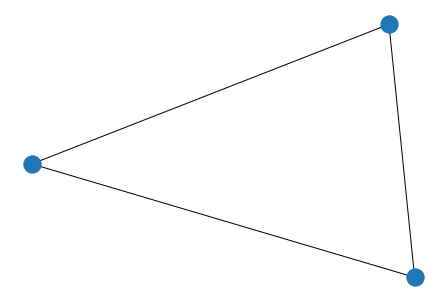

In [4]:
nx.draw(G)

In [5]:
d = {'1': {'2': None}, '2': {'1': None, '3': None}, '3': {'1': None}}
A = pgv.AGraph(data=d)
print(A) # This is the 'string' or simple representation of the Graph

strict graph "" {
	1 -- 2;
	2 -- 3;
	3 -- 1;
}



### Methods

```python
nx.subgraph(G, nbunch)      # induced subgraph view of G on nodes in nbunch
nx.union(G1,G2)             # graph union
nx.disjoint_union(G1,G2)    # graph union assuming all nodes are different
nx.cartesian_product(G1,G2) # return Cartesian product graph
nx.compose(G1,G2)           # combine graphs identifying nodes common to both
nx.complement(G)            # graph complement
nx.create_empty_copy(G)     # return an empty copy of the same graph class
nx.convert_to_undirected(G) # return an undirected representation of G
nx.convert_to_directed(G)   # return a directed representation of G
```

### Accessing edges and nodes

In [6]:
G.nodes()

NodeView((1, 2, 3))

In [7]:
G.edges()

EdgeView([(1, 2), (1, 3), (2, 3)])

In [8]:
G[1] # same as G.adj[1]

AtlasView({2: {}, 3: {}})

In [9]:
G[1][2]

{}

In [10]:
G.edges[1, 2]

{}

## Analysis on a Dataset

[Airlines](https://bitbucket.org/leoluyi/analyticsvidhya/src/master/Airlines.csv)

In [11]:
df = pd.read_csv('http://bit.ly/airline-raw', dtype=str)
df.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance
0,2013,2,26,1807,1630,97,1956,1837,79,EV,4411,N13566,EWR,MEM,144,946
1,2013,8,17,1459,1445,14,1801,1747,14,B6,1171,N661JB,LGA,FLL,147,1076
2,2013,2,13,1812,1815,-3,2055,2125,-30,AS,7,N403AS,EWR,SEA,315,2402
3,2013,4,11,2122,2115,7,2339,2353,-14,B6,97,N656JB,JFK,DEN,221,1626
4,2013,8,5,1832,1835,-3,2145,2155,-10,AA,269,N3EYAA,JFK,SEA,358,2422


In [12]:
df.shape

(100, 16)

In [13]:
df.dtypes

year              object
month             object
day               object
dep_time          object
sched_dep_time    object
dep_delay         object
arr_time          object
sched_arr_time    object
arr_delay         object
carrier           object
flight            object
tailnum           object
origin            object
dest              object
air_time          object
distance          object
dtype: object

In [14]:
df.loc[:, ['flight', 'dep_delay', 'arr_delay', 'distance', 'air_time']] = df.loc[:, ['flight', 'dep_delay', 'arr_delay', 'distance', 'air_time']].astype(float)

In [15]:
# converting sched_dep_time to 'std' - Scheduled time of departure
df['std'] = df['sched_dep_time'].astype(str).str.zfill(4).str.replace(r'^(\d{2})(\d{2})$', r'\1:\2')
df['std'].head()

0    16:30
1    14:45
2    18:15
3    21:15
4    18:35
Name: std, dtype: object

In [16]:
# converting sched_arr_time to 'sta' - Scheduled time of arrival
df['sta'] = df['sched_arr_time'].astype(str).str.zfill(4).str.replace(r'^(\d{2})(\d{2})$', r'\1:\2')
df['sta'].head()

0    18:37
1    17:47
2    21:25
3    23:53
4    21:55
Name: sta, dtype: object

In [17]:
# converting dep_time to 'atd' - Actual time of departure
df['atd'] = df['dep_time'].fillna(0).astype(np.int64).astype(str).str.zfill(4).str.replace(r'^(\d{2})(\d{2})$', r'\1:\2')
df['atd'].head()

0    18:07
1    14:59
2    18:12
3    21:22
4    18:32
Name: atd, dtype: object

In [18]:
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])
df['date'].head()

0   2013-02-26
1   2013-08-17
2   2013-02-13
3   2013-04-11
4   2013-08-05
Name: date, dtype: datetime64[ns]

In [19]:
# Final DataFrame
df.drop(columns = ['year', 'month', 'day'], inplace=True)
df.head()

,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,flight,tailnum,origin,dest,air_time,distance,std,sta,atd,date
0,1807,1630,97,1956,1837,79,EV,4411,N13566,EWR,MEM,144,946,16:30,18:37,18:07,2013-02-26
1,1459,1445,14,1801,1747,14,B6,1171,N661JB,LGA,FLL,147,1076,14:45,17:47,14:59,2013-08-17
2,1812,1815,-3,2055,2125,-30,AS,7,N403AS,EWR,SEA,315,2402,18:15,21:25,18:12,2013-02-13
3,2122,2115,7,2339,2353,-14,B6,97,N656JB,JFK,DEN,221,1626,21:15,23:53,21:22,2013-04-11
4,1832,1835,-3,2145,2155,-10,AA,269,N3EYAA,JFK,SEA,358,2422,18:35,21:55,18:32,2013-08-05


In [20]:
# Convert to nx object
FG = nx.from_pandas_edgelist(df, source='origin', target='dest', edge_attr=True,)
FG

In [21]:
FG.nodes

NodeView(('EWR', 'MEM', 'LGA', 'FLL', 'SEA', 'JFK', 'DEN', 'ORD', 'MIA', 'PBI', 'MCO', 'CMH', 'MSP', 'IAD', 'CLT', 'TPA', 'DCA', 'SJU', 'ATL', 'BHM', 'SRQ', 'MSY', 'DTW', 'LAX', 'JAX', 'RDU', 'MDW', 'DFW', 'IAH', 'SFO', 'STL', 'CVG', 'IND', 'RSW', 'BOS', 'CLE'))

In [22]:
FG.edges

EdgeView([('EWR', 'MEM'), ('EWR', 'SEA'), ('EWR', 'MIA'), ('EWR', 'ORD'), ('EWR', 'MSP'), ('EWR', 'TPA'), ('EWR', 'MSY'), ('EWR', 'DFW'), ('EWR', 'IAH'), ('EWR', 'SFO'), ('EWR', 'CVG'), ('EWR', 'IND'), ('EWR', 'RDU'), ('EWR', 'IAD'), ('EWR', 'RSW'), ('EWR', 'BOS'), ('EWR', 'PBI'), ('EWR', 'LAX'), ('EWR', 'MCO'), ('EWR', 'SJU'), ('LGA', 'FLL'), ('LGA', 'ORD'), ('LGA', 'PBI'), ('LGA', 'CMH'), ('LGA', 'IAD'), ('LGA', 'CLT'), ('LGA', 'MIA'), ('LGA', 'DCA'), ('LGA', 'BHM'), ('LGA', 'RDU'), ('LGA', 'ATL'), ('LGA', 'TPA'), ('LGA', 'MDW'), ('LGA', 'DEN'), ('LGA', 'MSP'), ('LGA', 'DTW'), ('LGA', 'STL'), ('LGA', 'MCO'), ('LGA', 'CVG'), ('LGA', 'IAH'), ('FLL', 'JFK'), ('SEA', 'JFK'), ('JFK', 'DEN'), ('JFK', 'MCO'), ('JFK', 'TPA'), ('JFK', 'SJU'), ('JFK', 'ATL'), ('JFK', 'SRQ'), ('JFK', 'DCA'), ('JFK', 'DTW'), ('JFK', 'LAX'), ('JFK', 'JAX'), ('JFK', 'CLT'), ('JFK', 'PBI'), ('JFK', 'CLE'), ('JFK', 'IAD'), ('JFK', 'BOS')])

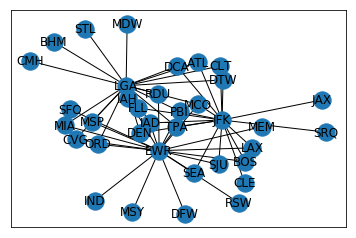

In [23]:
# Quick view of the Graph. As expected we see 3 very busy airports
nx.draw_networkx(FG, with_labels=True)

**Centrality and Connectivity**

In [24]:
# Notice the 3 airports from which all of our 100 rows of data originates
nx.algorithms.degree_centrality(FG)

{'EWR': 0.5714285714285714,
 'MEM': 0.02857142857142857,
 'LGA': 0.5714285714285714,
 'FLL': 0.05714285714285714,
 'SEA': 0.05714285714285714,
 'JFK': 0.4857142857142857,
 'DEN': 0.05714285714285714,
 'ORD': 0.05714285714285714,
 'MIA': 0.05714285714285714,
 'PBI': 0.08571428571428572,
 'MCO': 0.08571428571428572,
 'CMH': 0.02857142857142857,
 'MSP': 0.05714285714285714,
 'IAD': 0.08571428571428572,
 'CLT': 0.05714285714285714,
 'TPA': 0.08571428571428572,
 'DCA': 0.05714285714285714,
 'SJU': 0.05714285714285714,
 'ATL': 0.05714285714285714,
 'BHM': 0.02857142857142857,
 'SRQ': 0.02857142857142857,
 'MSY': 0.02857142857142857,
 'DTW': 0.05714285714285714,
 'LAX': 0.05714285714285714,
 'JAX': 0.02857142857142857,
 'RDU': 0.05714285714285714,
 'MDW': 0.02857142857142857,
 'DFW': 0.02857142857142857,
 'IAH': 0.05714285714285714,
 'SFO': 0.02857142857142857,
 'STL': 0.02857142857142857,
 'CVG': 0.05714285714285714,
 'IND': 0.02857142857142857,
 'RSW': 0.02857142857142857,
 'BOS': 0.0571428

In [25]:
# Average edge density of the Graphs
nx.density(FG)

0.09047619047619047

In [26]:
# # For a node of degree k - What is the average of its neighbours' degree?
nx.average_degree_connectivity(FG)

{20: 1.95, 1: 19.307692307692307, 2: 19.0625, 17: 2.0588235294117645, 3: 19.0}

### Shortest Path Problem

As is obvious from looking at the Graph visualization (way above) – There are multiple paths from some airports to others. Let us say we want to calculate the **shortest possible route** between 2 such airports. Right off the bat we can think of a couple of ways of doing it

1. There is the shortest path by distance
2. There is the shortest path by flight time

What we can do is to calculate the shortest path algorithm by weighing the paths with either the distance or airtime.

Let us take the example of `JAX` and `DFW` airports:

In [27]:
# Let us find all the paths available
for path in nx.all_simple_paths(FG, source='JAX', target='DFW'):
    print(path)

['JAX', 'JFK', 'DEN', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'MCO', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'DEN', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK', 'SEA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'ORD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'PBI', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAD', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MIA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'RDU', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'TPA', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'MSP', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'CVG', 'EWR', 'DFW']
['JAX', 'JFK', 'MCO', 'LGA', 'IAH', 'EWR', 'DFW']
['JAX', 'JFK',

In [28]:
# Let us find the dijkstra path from JAX to DFW.
# You can read more in-depth on how dijkstra works from this resource -
# https://courses.csail.mit.edu/6.006/fall11/lectures/lecture16.pdf

dijpath = nx.dijkstra_path(FG, source='JAX', target='DFW')
dijpath

['JAX', 'JFK', 'SEA', 'EWR', 'DFW']

In [29]:
# Let us try to find the dijkstra path weighted by airtime (approximate case)
shortpath = nx.dijkstra_path(FG, source='JAX', target='DFW', weight='air_time')
shortpath

['JAX', 'JFK', 'BOS', 'EWR', 'DFW']